<a href="https://colab.research.google.com/github/Repollo1000/ADA-Informes/blob/main/Informe_Bucketsort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Descripción del problema**

El problema de ordenamiento cosiste en una entrada de n numeros desordenados donde la salida de los numeros tiene que estar ordenado de menor a mayor.

Ejemplo:


```
Entrada:  [5, 2, 4, 6, 1, 3] 
Salida:  [1, 2, 3, 4, 5, 6]
```



Este problema a sido analizado y resuelto por muchos investigadores, 
por lo que ha surguido una gran variedad de algoritmos que resuelven el mismo problema, 
han nacido una serie de conceptos como notación de O mayúscula, 
algoritmos divide y vencerás, estructuras de datos, análisis de los casos peor, mejor, 
y promedio, y límites inferiores, 
esto es bueno para saber cual es mejor algoritmo dependiendo de lo que se necesite.

# **2.Descripción del algoritmo BucketSort**



El bucket sor es un algoritmo de clasificación por "cubos" la idea de este algoritmo sé ordenan los n elementos de menor a mayor.

Para ordenar el algoritmo debe dividir los elementos por grupos de manera uniforme que seran guardado en cubos luego seran ordenados por cualquier otro algoritmo de clasificacion, finalmente los cubos se concatenaran de manera ordenada y retornara el arreglo ordenado.

Funcionamiento del algoritmo


1.   Se le ingresa un arreglo con n elementos, es decir, se divide en n sub-intervalos y cada intervalo sería un bucket.
2.   Se recorre el arreglo, cada elemento se ingresa al bucket que le corresponde `arr[i] en el cubo[n*bucket[i]]`.
3.   Cada bucket se clasifica con el insertion sort que vimos 
anteriormente.
4.   Los bucket se concatenan para retornar el valor ordenado.

Ventajas y Desventaja:


*   La clasificación de cubos reduce el número de comparaciones.
*   sintóticamente rápido debido a la distribución uniforme de los elementos.

*   Puede o no ser un algoritmo de clasificación estable.
*   No es útil si tenemos un arreglo grande









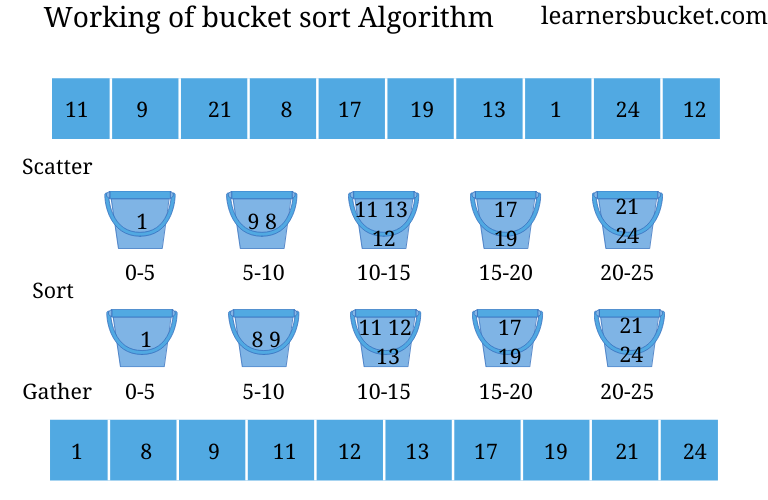

## **2.1.Ejemplo paso a paso**

`arr = [0.17 , 0.47 , 0.39 , 0.26]`

Primero craremos n buckets dependiendo de la cantidad de elementos que se encunetran en el arreglo.

en este caso seran 4 buckets.

ahora debemos distribuir los elemntos en los buckets.

0.17*10 = 1.7 nos quedamos con la parte entera que es 1, por lo cual guardaremos el elementos en la casilla 0

```
0  [0.17]

1

2

3

```

0.47*10 = 4.7 nos quedamos con la parte entera que es 4, por lo cual guardaremos el elementos en la casilla 3

```
0  [0.17]

1

2

3  [0.47]

```

0.39*10 = 3.9 nos quedamos con la parte entera que es 3, por lo cual guardaremos el elementos en la casilla 2

```
0  [0.17]

1

2  [0.39]

3  [0.47]

```
0.26*10 = 2.6 nos quedamos con la parte entera que es 2, por lo cual guardaremos el elementos en la casilla 1

```
0  [0.17]

1  [0.26]

2  [0.39]

3  [0.47]

```

Ahora aplicamos insertion sort a cada casilla para ordenar el los buckets
en este caso ya estan todos ordenados entonces debemos concatenar los buckets

Asi obtenemos Arr = [0.17 , 0.26 , 0.39 , 0.47]

# **3.Código**

In [37]:
def insertionSort(b):
    for i in range(1, len(b)):
        up = b[i]
        j = i - 1
        while j >= 0 and b[j] > up: 
            b[j + 1] = b[j]
            j -= 1
        b[j + 1] = up     
    return b     
              

def bucketSort(x,verbose = False):
    arr = []
    slot_num = 10 
    for i in range(slot_num):
        arr.append([])
          
    # elementos en diferentes buckets
    for j in x:
        index_b = int(slot_num * j) 
        arr[index_b].append(j)
        if (verbose == True):
         print("elemtos en el bucket ",arr[index_b])
      
    # Sort buckets
    for i in range(slot_num):
        arr[i] = insertionSort(arr[i])
        if (verbose == True):
            print("bucket ordenado: ", arr[i])
          
    
    k = 0
    for i in range(slot_num):
        for j in range(len(arr[i])):
            x[k] = arr[i][j]
            k += 1
            #print(x)
    return x
  
x = [0.897, 0.565,0.665, 0.1234,  0.656, 0.3434] 
print("Arreglo desordenado: ", x)
bucketSort(x,verbose = False)
print("Arreglo ordenado: ", x)
#print(bucketSort(x))


Arreglo desordenado:  [0.897, 0.565, 0.665, 0.1234, 0.656, 0.3434]
Arreglo ordenado:  [0.1234, 0.3434, 0.565, 0.656, 0.665, 0.897]


## **3.1Verbose = True**

In [38]:
verbos = True
bucketSort(x,verbose = True)

elemtos en el bucket  [0.1234]
elemtos en el bucket  [0.3434]
elemtos en el bucket  [0.565]
elemtos en el bucket  [0.656]
elemtos en el bucket  [0.656, 0.665]
elemtos en el bucket  [0.897]
bucket ordenado:  []
bucket ordenado:  [0.1234]
bucket ordenado:  []
bucket ordenado:  [0.3434]
bucket ordenado:  []
bucket ordenado:  [0.565]
bucket ordenado:  [0.656, 0.665]
bucket ordenado:  []
bucket ordenado:  [0.897]
bucket ordenado:  []


[0.1234, 0.3434, 0.565, 0.656, 0.665, 0.897]

# **4.Explique por qué el algoritmo es correcto (prueba de correctitud).**

Para explicar la correctitud del bucket sort debemos saber que trabaja en conjunto con otra función que es el inserttion sort a sique también debemos probar su correctitud aunque ya lo hicimos antes.

### **Correctitud insertion sort:** 
##***Teorema de correctitud 1*** 
El algortimo **Insertion Sort** entregara un arreglo ordenado de forma ascende con los mismos datos del arreglo entregado por el usuario.

####**Prueba del teorema 1**
Analizando su código, podemos notar que por cada pasada i que realizó, los elementos del arreglo desde **i - 1** hasta **i = 0** estaran ordenados en orden ascendente.

A continuacion demostraremos la siguiente **propiedad invariante de bucle** del algoritmo Insertion Sort:



*   "Al comiezo de cada pasada  i (iteración), obtendremos un subarreglo ordenado desde la posición ( i -1 ) hasta ( i = 0 ), con los mismos elementos en esas posiones del arreglo de entrada".


**arreglo de ejemplo = arr = [7,6,14,2,5]**

**Comienzo**

En la primera pasada (i = 1), tenemos que **desde ( i - 1 ) hasta (1 = 0)** veremos un subarreglo ordenado [7] con los mismo numeros en esas posiciones del arreglo de entrada. Todos los elementos anteriores a i cumplen con la propiedad.

**Mantención**

Para todas las interaciones, tendremos que al comienzo se cumplira la propiedad desde ( i - 1 ) hasta  ( i = 0 ).


**Finalización**

Si observamos el codigo de ejemplo, podremos ver que durante todo el algoritmo se va cumpliendo la condicion planteada, en la iteracion i, correspondiente a analizar el numero en la posicion i del arreglo veremos que en todos los elementos anteriores a i tendremos un subarreglo ordenado de forma ascendente.


####**Prueba del teorema 1**

Despues de analizar los pasos de BucketSort pudimos notar que el unico procedimiento que necesitabamos probar era Insertion Sort, por ende, basandonos en el teorema de correctitud 2, asumimos que el ordenamiento de cada bucket se realizará correctamente y por ende el arreglo quedara ordenado de menor a mayor.

### **Correctitud Bucket sort:**

"El algoritmo BucketSort ordenará de manera ascendente los elementos del arreglo de entrada" 

Para probar la correctitud de BucketSort analizaremos primero las partes de su código.

**Creación de baldes**: La creacion de baldes es un proceso bastante sencillo, a traves de un ciclo for se crear n casillas vacías y se concatenan una con otra, por lo que tal proceso siempre funcionará correctamente.

**Distribucion de elementos a buckets**: Para distribuir los elementos del arreglo de entrada en los diferentes bucket lo que se realiza es nuevamente bastante sencillo, **se multiplica el número por 10**, obteniendo así el indice de su bucket correspondiente, ejemplo:

```
num = 0,52
0,52 * 10 = 5,2 #Nos quedamos con su parte entera
Y asi obtenemos el número 5, correspondiente al indice del bucket correcto.

```

Este proceso se realiza a traves de un for y una multiplicación y siempre funcionarán correctamente.

**Ordenamiento de cada bucket**: Para ordenar cada bucket se llama a el algoritmo Insertion Sort, probaremos su correctitud.


**Obtención de elementos:** Para finalizar, a travez de dos for anidados se recorre cada bucket obteniendo los elementos ya ordenados, si el ordenamiento se realiza correctamente, este proceso tambien lo hará, probraremos la correctitud del ordenamiento a continuacion.



# **5.Analice el tiempo de ejecución del algoritmo.**

**Analisis bucket sort**

Para analizar el costo del tiempo de ejecución del bucket sort debemos primero tener en consideración a las llamadas del insertion sort debemos dejar una variable aleatoria asignándole un lugar en el bucket sort b[i],recordemos que el tiempo de ejecución del insertion sort en un caso promedio es o(n) y peor caso o(n^2).


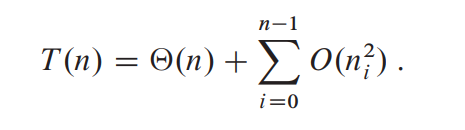

Ahora analizamos el peor caso del tiempo de ejecución del bucket sort, se espera un valor de tiempo de ejecución, aquí vamos a esperar la posibilidad que los elementos ingresados tengan la distribución necesaria para ambas partes usando linealidad.

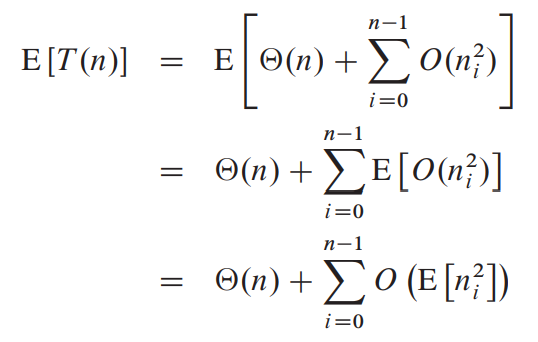

Ahora podemos afirmar que:

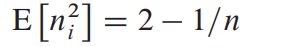

Si evaluamos los valores esperados en la primera sumatoria podremos concluir que el tiempo de ejecución del caso promedio es O(n). También podemos observar que no es necesario que la entrada sea uniforme gracias a la propiedad de suma de cuadrados y esta propiedad nos indica que el bucket sort siempre se ejecutara en tiempo lineal .

A diferencia del peor caso es O(n^2) que seria por el insertion sort que en resumen seria cuando está ordenado de mayor a menor porque tendría que realizar una gran cantidad de comparaciones, el tiempo de ejecución seria (O(n^2)).


# **6.Experimentos**


In [24]:


def countingSort(arr, exp1):

	n = len(arr)

	output = [0] * (n)

	
	count = [0] * (10)

	
	for i in range(0, n):
		index = arr[i] // exp1
		count[index % 10] += 1


	for i in range(1, 10):
		count[i] += count[i - 1]


	i = n - 1
	while i >= 0:
		index = arr[i] // exp1
		output[count[index % 10] - 1] = arr[i]
		count[index % 10] -= 1
		i -= 1

	i = 0
	for i in range(0, len(arr)):
		arr[i] = output[i]


def radixSort(arr):

	max1 = max(arr)

	exp = 1
	while max1 / exp >= 1:
		countingSort(arr, exp)
		exp *= 10


arr = [170, 45, 75, 90, 802, 24, 2, 66]

# Function Call
radixSort(arr)

for i in range(len(arr)):
	print(arr[i],end=" ")



2 24 45 66 75 90 170 802 

In [36]:

def count_sort(arr):
	max_element = int(max(arr))
	min_element = int(min(arr))
	range_of_elements = max_element - min_element + 1

	count_arr = [0 for _ in range(range_of_elements)]
	output_arr = [0 for _ in range(len(arr))]


	for i in range(0, len(arr)):
		count_arr[arr[i]-min_element] += 1


	for i in range(1, len(count_arr)):
		count_arr[i] += count_arr[i-1]


	for i in range(len(arr)-1, -1, -1):
		output_arr[count_arr[arr[i] - min_element] - 1] = arr[i]
		count_arr[arr[i] - min_element] -= 1


	for i in range(0, len(arr)):
		arr[i] = output_arr[i]

	return arr


arr = [-5, -10, 0, -3, 8, 5, -1, 10]
ans = count_sort(arr)
print("Sorted character array is " + str(ans))


Sorted character array is [-10, -5, -3, -1, 0, 5, 8, 10]


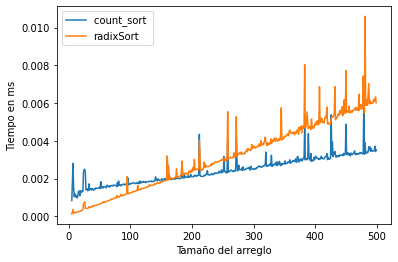

In [17]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random


x=[]; y=[]
y1=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  cont = [0,0]
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  t1 = repeat(setup="from __main__ import count_sort", stmt=f"count_sort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)

plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["count_sort ", "radixSort"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

In [20]:
#Codigo de bucketSort implementado para números enteros

def bucket_sort(input_list):
    
    max_value = max(input_list)
    size = max_value/len(input_list)

    
    buckets_list= []
    for x in range(len(input_list)):
        buckets_list.append([]) 

    for i in range(len(input_list)):
        j = int (input_list[i] / size)
        if j != len (input_list):
            buckets_list[j].append(input_list[i])
        else:
            buckets_list[len(input_list) - 1].append(input_list[i])

    for z in range(len(input_list)):
        insertionSort(buckets_list[z])
            
    final_output = []
    for x in range(len (input_list)):
        final_output = final_output + buckets_list[x]
    return final_output

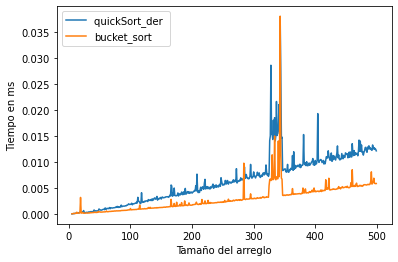

In [23]:
def partition_der(array, inicio, fin,comp,verbose=False):  
    izquierda = inicio
    Derecha = fin - 1
    pivot = array[fin]
    
    if (verbose == True):
        print("Pivote: ",pivot)
    while izquierda < Derecha:
        #print("paso1")
        
        comp[1] = comp[1] + 1
        while izquierda < fin and array[izquierda] < pivot:
            comp[1] = comp[1] + 1
            izquierda = izquierda + 1
            #print("paso2")
            
        while inicio < Derecha and array[Derecha] >= pivot:
            Derecha = Derecha - 1
            comp[1] = comp[1] + 1
            #print("paso3")    

        if izquierda < Derecha:
          array[izquierda], array[Derecha] = array[Derecha], array[izquierda]
          comp[1] = comp[1] + 1
        else:
          comp[1] = comp[1] + 1
                
    if (array[izquierda] > pivot):
      comp[1] = comp[1] + 1
      if (verbose == True):
        print("Se Intercambian:", array[izquierda], ">", pivot)
      array[izquierda], array[fin] = array[fin], array[izquierda]
    else:
      if (verbose == True):
        print("No Intercambian:", array[izquierda], "<", pivot)
      comp[1] = comp[1] + 1
    if (verbose == True):
      print("Despues del partition: ",array)
    return izquierda

def quickSort_der(array, inicio, fin,comp,verbose=False):
    if inicio < fin:
      comp[0] = comp[0] + 1
      pivote = partition_der(array, inicio, fin,comp,verbose)
      quickSort_der(array, inicio, pivote - 1,comp,verbose)
      quickSort_der(array, pivote + 1, fin,comp,verbose)


x=[]; y=[]
y1=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  cont = [0,0]
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  t1 = repeat(setup="from __main__ import quickSort_der", stmt=f"quickSort_der({a},{0},{n-1},{cont},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({a})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)

plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["quickSort_der ", "bucket_sort"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

# **7.Análisis experimentos**

### **Grafico 1:**

En el primer gráfico podemos apreciar que el couting sort es más rápido que el radix sort debido a que el couting sort no depende de otro algoritmo como el radix sort que depende del couting sort es decir el radix sort tardar más debido a que tiene un ciclo while más. Algo curioso que ocurre en el gráfico es que para arreglos con menos elementos el couting sort es más rápido y podemos concluir que para menos cantidad de elementos es mejor el radixsort.

### **Grafico 2:**

En este gráfico se puede ver que tienen el mismo tipo de crecimiento, pero no igual pendiente, ya que queda en evidencia en este experimento que es más rápido el couting sort que el quick sort, pero el único problema es que el couting sort es para enteros o para decimales entonces para utilizarlo depende del arreglo que queremos ordenar.


Sobre los 2 graficos podemos ver unos s peak repentinos se puede seguir diciendo que son actitudes impredecibles del procesador.